# Install Liberaries

In [ ]:
! pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=d73b6799eafe26c9edfdf35b5d6713b5d2d6f47ca2d4e99a8d6607ff16eeb0df
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


In [ ]:
! pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.

In [ ]:
!pip install datasets

# Import Libraries

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer
from datasets import load_from_disk
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from collections import Counter
import re
import random
import numpy as np
from tqdm import tqdm
import evaluate
from sklearn.model_selection import train_test_split
import nltk


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load data

In [ ]:
from datasets import load_dataset

# Load dataset
dataset = load_dataset("SwayStar123/preprocessed_recap-coco30k-moondream")

# Save to Google Drive
save_path = "/content/drive/MyDrive/image_captioning/datasets/recap-coco30k"  # Customize this path
dataset.save_to_disk(save_path)

print(f"Dataset saved to Google Drive: {save_path}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Resolving data files:   0%|          | 0/96 [00:00<?, ?it/s]

train-00003-of-00004.parquet:   0%|          | 0.00/29.7k [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/30.2k [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/105k [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/32.2k [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/31.5k [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/56.6k [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/185k [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/158k [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/107k [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/163k [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/86.4k [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/30.5k [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/55.9k [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/168k [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/31.3k [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/30.1k [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/107k [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/56.1k [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/287k [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/1.19M [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/221k [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/267k [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/396k [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/86.0k [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/58.4k [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/162k [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/276k [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/251k [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/250k [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/396k [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/632k [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/785k [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/605k [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/631k [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/4.48M [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/45.2M [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/46.1M [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/2.99M [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/3.71M [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/3.30M [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/4.53M [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/4.18M [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/3.53M [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/46.5M [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/4.62M [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/44.8M [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/44.3M [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/45.2M [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/44.5M [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/47.3M [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/2.21M [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/2.03M [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/2.44M [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/7.50M [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/2.35M [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/8.10M [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/7.12M [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/7.28M [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/1.15M [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/16.7M [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/924k [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/14.3M [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/14.6M [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/14.4M [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/965k [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/14.8M [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/1.02M [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/983k [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/109k [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/657k [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/553k [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/814k [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/214k [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/84.1k [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/108k [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/58.4k [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/31.2k [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/169k [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/29.4k [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/58.5k [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/32.0k [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/30.1k [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/58.2k [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/30.1k [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/33.0k [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/56.2k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/30504 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/30504 [00:00<?, ? examples/s]

Dataset saved to Google Drive: /content/drive/MyDrive/image_captioning/datasets/recap-coco30k


In [ ]:
import os
directory_path = "/content/drive/MyDrive/image_captioning/datasets/recap-coco30k/train"
file_list = os.listdir(directory_path)

print(file_list)

['cache-4a978658ffdd63fa.arrow', 'cache-02a9495a3afb8d1a.arrow', 'cache-cd8ee5830b76b593.arrow', 'cache-ec2564d71f510d58.arrow', 'cache-7242edbd9df29e17.arrow', 'cache-b1d117caa057e18f.arrow', 'cache-e6e027eb27436ba3.arrow', 'cache-7cb72a2dd8ffa569.arrow', 'data-00000-of-00002.arrow', 'data-00001-of-00002.arrow', 'state.json', 'dataset_info.json']


# Read Data

In [ ]:
from datasets import load_from_disk

dataset = load_from_disk(directory_path)

print(dataset)

Dataset({
    features: ['image_id', 'caption', 'vae_latent', 'vae_latent_shape', 'text_embedding'],
    num_rows: 30504
})


In [ ]:
# Print basic info
print(dataset)


print(dataset[0])


Dataset({
    features: ['image_id', 'caption', 'vae_latent', 'vae_latent_shape', 'text_embedding'],
    num_rows: 30504
})
{'image_id': 485237, 'caption': 'The image captures a bustling scene at an airport. Two large airplanes, one white and the other gray, are parked on the tarmac. The white airplane has a yellow tail and is positioned slightly ahead of its counterpart. Several vehicles, including trucks and cars, are scattered around the tarmac, indicating ongoing operations. In the background, buildings rise up against a clear blue sky, suggesting the presence of an airport terminal or control tower.', 'vae_latent': [3.7187328338623047, 1.21875, 3.886786699295044, 2.072293758392334, 4.777338027954102, 3.818338632583618, 2.654279947280884, -0.8139682412147522, 0.31786736845970154, 2.5214786529541016, 0.20335717499256134, -0.11824672669172287, 1.9198745489120483, 6.101564407348633, 5.523430347442627, 2.7031261920928955, 3.2363388538360596, 1.8320125341415405, 1.7929717302322388, -0.4

In [ ]:
print(len(dataset[0]['vae_latent']))

3712


In [ ]:
# Get all captions (for text-only tasks)
captions = dataset["caption"]  # List of 30,504 strings
print(
  'the first caption is:',
  captions[0],
  '\n'
)


the first caption is: The image captures a bustling scene at an airport. Two large airplanes, one white and the other gray, are parked on the tarmac. The white airplane has a yellow tail and is positioned slightly ahead of its counterpart. Several vehicles, including trucks and cars, are scattered around the tarmac, indicating ongoing operations. In the background, buildings rise up against a clear blue sky, suggesting the presence of an airport terminal or control tower. 



In [ ]:
import pandas as pd
df = pd.DataFrame({
    "image_id": dataset["image_id"],
    "caption": dataset["caption"],
    "latent_shape": dataset["vae_latent_shape"]
})
df.head()  # Inspect the first 5 rows

image_id                                            caption    latent_shape
0    485237  The image captures a bustling scene at an airp...  [1, 4, 16, 58]
1    274869  The image depicts a sailboat with a white sail...  [1, 4, 16, 58]
2    280242  The image depicts a cozy bedroom with a bed dr...  [1, 4, 16, 58]
3    361258  The image depicts a vibrant beach scene with r...  [1, 4, 16, 58]
4    375469  In the image, two surfers are riding a large w...  [1, 4, 16, 58]

# Model Implementation and Data preparetion

## Download nltk packages

In [ ]:
# NLTK setup (only once at startup)
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('omw-1.4', quiet=True)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


## Enhanced Tokenizer Implementation

In [ ]:
# --- Enhanced Tokenizer Implementation ---
class EnhancedTokenizer:
    def __init__(self, captions, min_freq=5):
        self.min_freq = min_freq
        self.special_tokens = ["<pad>", "<start>", "<end>", "<unk>"]
        self.build_vocab(captions)

    def build_vocab(self, captions):
        counter = Counter()
        for caption in captions:
            tokens = self.tokenize(caption)
            counter.update(tokens)

        self.word2idx = {token: idx for idx, token in enumerate(self.special_tokens)}
        for word, freq in counter.items():
            if freq >= self.min_freq:
                self.word2idx[word] = len(self.word2idx)

        self.idx2word = {idx: word for word, idx in self.word2idx.items()}

    def tokenize(self, text):
        text = text.lower()
        # Handle contractions
        text = re.sub(r"won't", "will not", text)
        text = re.sub(r"can\'t", "can not", text)
        text = re.sub(r"n\'t", " not", text)
        text = re.sub(r"\'re", " are", text)
        text = re.sub(r"\'s", " is", text)
        text = re.sub(r"\'d", " would", text)
        text = re.sub(r"\'ll", " will", text)
        text = re.sub(r"\'t", " not", text)
        text = re.sub(r"\'ve", " have", text)
        text = re.sub(r"\'m", " am", text)
        # Handle punctuation
        text = re.sub(r'([.!?])', r' \1', text)
        text = re.sub(r'[^a-zA-Z.!?]+', r' ', text)
        return text.split()

    def encode(self, text):
        tokens = self.tokenize(text)
        tokens = ["<start>"] + tokens + ["<end>"]
        return [self.word2idx.get(token, self.word2idx["<unk>"]) for token in tokens]

    def decode(self, indices):
        words = [self.idx2word.get(idx, "<unk>") for idx in indices]
        return " ".join(words)

    def vocab_size(self):
        return len(self.word2idx)

## Model Architecture

### Attention Mechanism

In [ ]:
# --- Attention Mechanism ---
class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super(Attention, self).__init__()
        self.attention = nn.Linear(hidden_dim, hidden_dim)
        self.v = nn.Linear(hidden_dim, 1, bias=False)

    def forward(self, hidden, encoder_outputs):
        # hidden shape: (batch_size, hidden_dim)
        # encoder_outputs shape: (batch_size, seq_len, hidden_dim)

        # Add sequence dimension to hidden
        hidden = hidden.unsqueeze(1)  # (batch_size, 1, hidden_dim)

        # Calculate attention energies
        energy = torch.tanh(self.attention(encoder_outputs))  # (batch_size, seq_len, hidden_dim)
        attention = self.v(energy).squeeze(2)  # (batch_size, seq_len)

        return F.softmax(attention, dim=1)  # (batch_size, seq_len)

### Image Captioning Model

In [ ]:
# --- Improved Model Architecture with Attention ---
class ImageCaptioningModel(nn.Module):
    def __init__(self, latent_dim, embed_dim, hidden_dim, vocab_size, num_layers=2, dropout=0.3):
        super(ImageCaptioningModel, self).__init__()
        self.num_layers = num_layers
        self.hidden_dim = hidden_dim

        # Project latent vector to initial hidden state
        self.latent2hidden = nn.Linear(latent_dim, hidden_dim * num_layers)

        # Embedding and LSTM
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.dropout = nn.Dropout(dropout)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, num_layers=num_layers,
                           batch_first=True, dropout=dropout if num_layers > 1 else 0)

        # Output layer
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, vae_latent, captions):
        batch_size = vae_latent.size(0)
        seq_len = captions.size(1) if captions.dim() > 1 else 1

        # Initialize hidden states
        hidden = self.latent2hidden(vae_latent)
        hidden = hidden.view(batch_size, self.num_layers, self.hidden_dim)
        hidden = hidden.permute(1, 0, 2).contiguous()
        cell = torch.zeros_like(hidden)

        # Embed captions
        embeddings = self.dropout(self.embedding(captions))

        # LSTM - process entire sequence
        outputs, _ = self.lstm(embeddings, (hidden, cell))
        outputs = self.dropout(outputs)

        # Final output for all time steps
        outputs = self.fc(outputs)  # (batch_size, seq_len, vocab_size)

        return outputs

### Dataset Class with Latent Dimension Handling

In [ ]:
# --- Dataset Class with Latent Dimension Handling ---
class CaptionDataset(Dataset):
    def __init__(self, dataset, tokenizer, max_length=30, target_latent_dim=4096):
        self.dataset = dataset
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.target_latent_dim = target_latent_dim

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]

        # Handle VAE latent vector
        latent = np.array(item['vae_latent'])
        current_dim = len(latent)

        # Standardize latent vector size
        if current_dim < self.target_latent_dim:
            # Pad with zeros
            pad_size = self.target_latent_dim - current_dim
            latent = np.pad(latent, (0, pad_size), 'constant')
        elif current_dim > self.target_latent_dim:
            # Truncate
            latent = latent[:self.target_latent_dim]

        vae_latent = torch.tensor(latent, dtype=torch.float32)

        # Handle caption
        caption = item['caption']
        encoded = self.tokenizer.encode(caption)

        # Pad/truncate caption
        if len(encoded) < self.max_length:
            encoded += [self.tokenizer.word2idx["<pad>"]] * (self.max_length - len(encoded))
        else:
            encoded = encoded[:self.max_length]

        encoded = torch.tensor(encoded, dtype=torch.long)
        return vae_latent, encoded

## Model Implemetation

### Evaluation Metrics

In [ ]:
# --- Evaluation Metrics ---
def init_metrics():
    try:
        bleu = evaluate.load("bleu")
        meteor = evaluate.load("meteor")
        rouge = evaluate.load("rouge")
        return bleu, meteor, rouge
    except Exception as e:
        print(f"Error loading metrics: {e}")
        return None, None, None

def evaluate_model(model, dataloader, tokenizer, device):
    bleu, meteor, rouge = init_metrics()
    if bleu is None:
        return {'bleu': {'bleu': 0}, 'meteor': {'meteor': 0}, 'rouge': {'rougeL': 0}}

    model.eval()
    all_predictions = []
    all_references = []

    with torch.no_grad():
        for vae_latent, captions in dataloader:
            vae_latent = vae_latent.to(device)
            captions = captions.to(device)

            # Generate captions with beam search
            generated = []
            for i in range(vae_latent.size(0)):
                caption = beam_search(model, vae_latent[i].unsqueeze(0), tokenizer, device)
                generated.append(caption)

            # Decode true captions
            true_captions = [
                tokenizer.decode(caption[1:].cpu().numpy())  # skip <start>
                for caption in captions
            ]

            all_predictions.extend(generated)
            all_references.extend([[cap] for cap in true_captions])

    # Compute metrics
    try:
        bleu_score = bleu.compute(predictions=all_predictions, references=all_references)
        meteor_score = meteor.compute(predictions=all_predictions, references=all_references)
        rouge_score = rouge.compute(predictions=all_predictions, references=all_references)
    except Exception as e:
        print(f"Error computing metrics: {e}")
        bleu_score = {'bleu': 0}
        meteor_score = {'meteor': 0}
        rouge_score = {'rougeL': 0}

    print(f"BLEU: {bleu_score['bleu']:.4f}")
    print(f"METEOR: {meteor_score['meteor']:.4f}")
    print(f"ROUGE-L: {rouge_score['rougeL']:.4f}")
    return bleu_score, meteor_score, rouge_score

### Beam Search Decoding

In [ ]:
# --- Beam Search Decoding ---
def beam_search(model, vae_latent, tokenizer, device, beam_width=3, max_length=30):
    model.eval()
    with torch.no_grad():
        # Initialize hidden states with correct dimensions
        hidden = model.latent2hidden(vae_latent)  # (batch_size, hidden_dim * num_layers)
        hidden = hidden.view(model.num_layers, 1, model.hidden_dim)  # (num_layers, batch_size, hidden_dim)
        cell = torch.zeros_like(hidden, device=device)  # Initialize cell state on the same device

        # Start token
        start_token = torch.tensor([tokenizer.word2idx["<start>"]], device=device)

        # Initialize beams
        beams = [{
            'tokens': [start_token],
            'score': 0.0,
            'hidden': hidden,
            'cell': cell
        }]

        for _ in range(max_length):
            candidates = []
            for beam in beams:
                if beam['tokens'][-1].item() == tokenizer.word2idx["<end>"]:
                    candidates.append(beam)
                    continue

                input_token = beam['tokens'][-1].unsqueeze(0).unsqueeze(0)  # (1, 1)
                embedding = model.embedding(input_token)  # (1, 1, embed_dim)

                # Reshape embedding: (batch_size, seq_len, embed_dim)
                embedding = embedding.view(embedding.size(0), embedding.size(1), -1)

                # Pass hidden and cell states from the beam
                output, (hidden, cell) = model.lstm(embedding, (beam['hidden'], beam['cell']))
                output = model.fc(output.squeeze(1))
                log_probs = F.log_softmax(output, dim=1)

                topk_probs, topk_tokens = log_probs.topk(beam_width)

                for i in range(beam_width):
                    token = topk_tokens[0][i].unsqueeze(0)
                    score = beam['score'] + topk_probs[0][i].item()
                    candidates.append({
                        'tokens': beam['tokens'] + [token],
                        'score': score,
                        'hidden': hidden,
                        'cell': cell
                    })

            beams = sorted(candidates, key=lambda x: x['score'], reverse=True)[:beam_width]

            if all(beam['tokens'][-1].item() == tokenizer.word2idx["<end>"] for beam in beams):
                break

        best_beam = beams[0]
        tokens = [t.item() for t in best_beam['tokens'][1:]]  # Exclude <start>
        if tokens[-1] == tokenizer.word2idx["<end>"]:
            tokens = tokens[:-1]  # Exclude <end> if present
        return tokenizer.decode(tokens)

In [ ]:
def train_model(model, train_loader, val_loader, test_loader, optimizer, criterion,
                tokenizer, num_epochs=15, device="cpu", patience=3):
    # Initialize metrics
    bleu, meteor, rouge = init_metrics()

    # Training variables
    best_val_loss = float('inf')
    best_metrics = {'bleu': {'bleu': 0}, 'meteor': {'meteor': 0}, 'rouge': {'rougeL': 0}}
    epoch_metrics = {'bleu': {'bleu': 0}, 'meteor': {'meteor': 0}, 'rouge': {'rougeL': 0}}
    no_improvement = 0
    history = {
        'train_loss': [],
        'val_loss': [],
        'bleu': [],
        'meteor': [],
        'rouge': []
    }

    # Schedulers
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]")

        for vae_latent, captions in progress_bar:
            vae_latent = vae_latent.to(device)
            captions = captions.to(device)

            optimizer.zero_grad()

            # Forward pass
            outputs = model(vae_latent, captions[:, :-1])

            # Calculate loss
            loss = criterion(
                outputs.reshape(-1, outputs.shape[-1]),
                captions[:, 1:].reshape(-1)
            )

            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            train_loss += loss.item()
            progress_bar.set_postfix({"loss": loss.item()})

        # Validation Phase
        val_loss = 0.0
        model.eval()
        with torch.no_grad():
            for vae_latent, captions in val_loader:
                vae_latent = vae_latent.to(device)
                captions = captions.to(device)

                outputs = model(vae_latent, captions[:, :-1])
                loss = criterion(
                    outputs.reshape(-1, outputs.shape[-1]),
                    captions[:, 1:].reshape(-1)
                )
                val_loss += loss.item()

        avg_train_loss = train_loss / len(train_loader)
        avg_val_loss = val_loss / len(val_loader)
        history['train_loss'].append(avg_train_loss)
        history['val_loss'].append(avg_val_loss)

        # Evaluation
        if (epoch + 1) % 2 == 0 or epoch == num_epochs - 1:
            print("\nEvaluating on validation set...")
            bleu_score, meteor_score, rouge_score = evaluate_model(model, val_loader, tokenizer, device)
            history['bleu'].append(bleu_score['bleu'])
            history['meteor'].append(meteor_score['meteor'])
            history['rouge'].append(rouge_score['rougeL'])
            epoch_metrics = (bleu_score, meteor_score, rouge_score)

        scheduler.step()

        print(f"\nEpoch {epoch+1}/{num_epochs} Summary:")
        print(f"Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

        # Model checkpointing
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            if (epoch + 1) % 2 == 0 or epoch == num_epochs - 1:
                best_metrics = epoch_metrics
            no_improvement = 0
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': best_val_loss,
                'metrics': best_metrics,
                'word2idx': tokenizer.word2idx,
                'idx2word': tokenizer.idx2word
            }, "best_model.pth")
            print("Saved new best model!")
        else:
            no_improvement += 1
            if no_improvement >= patience:
                print(f"No improvement for {patience} epochs. Early stopping!")
                break

    # Final Test Evaluation
    print("\nTraining complete. Evaluating on test set...")
    try:
        # Try with weights_only=False first (more secure)
        checkpoint = torch.load("best_model.pth", weights_only=False)
        model.load_state_dict(checkpoint['model_state_dict'])
    except Exception as e:
        print(f"Secure loading failed, trying fallback: {str(e)}")
        # Fallback for older PyTorch versions or if secure loading fails
        checkpoint = torch.load("best_model.pth", map_location=device)
        model.load_state_dict(checkpoint['model_state_dict'])

    test_metrics = evaluate_model(model, test_loader, tokenizer, device)

    return model, history, {
        'best_val_loss': best_val_loss,
        'best_val_metrics': best_metrics,
        'test_metrics': test_metrics
    }

# 2. Initialize tokenizer (using all captions)

In [ ]:

# 2. Initialize tokenizer (using all captions)
all_captions = [item['caption'] for item in dataset]
tokenizer = EnhancedTokenizer(all_captions)


# 3. Create dataset

In [ ]:
# 3. Create dataset
full_dataset = CaptionDataset(dataset, tokenizer)


#  4. Split into train/val/test

In [ ]:
# 4. Split into train/val/test
train_size = int(0.8 * len(full_dataset))
val_size = int(0.1 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

train_data, val_data, test_data = torch.utils.data.random_split(
    full_dataset,
    [train_size, val_size, test_size],
    generator=torch.Generator().manual_seed(42)
)


#  5. Create dataloaders

In [ ]:
# 5. Create dataloaders
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)


#  6. Initialize model with correct latent dimension

In [ ]:
# 6. Initialize model with correct latent dimension
model = ImageCaptioningModel(
    latent_dim=4096,  # Must match your VAE latent dimension
    embed_dim=300,
    hidden_dim=600,
    vocab_size=tokenizer.vocab_size(),
    num_layers=2,
    dropout=0.3
).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss(ignore_index=tokenizer.word2idx["<pad>"])
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

#   7. Train the model

In [ ]:
# 7. Train the model
model, history, results = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    criterion=criterion,
    tokenizer=tokenizer,
    num_epochs=30,
    device=device,
    patience=3
)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Epoch 1/30 [Train]: 100%|██████████| 382/382 [01:39<00:00,  3.84it/s, loss=3]



Epoch 1/30 Summary:
Train Loss: 3.7880 | Val Loss: 2.7757
Saved new best model!


Epoch 2/30 [Train]: 100%|██████████| 382/382 [01:34<00:00,  4.03it/s, loss=2.28]



Evaluating on validation set...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


BLEU: 0.0799
METEOR: 0.2532
ROUGE-L: 0.2738

Epoch 2/30 Summary:
Train Loss: 2.5865 | Val Loss: 2.2683
Saved new best model!


Epoch 3/30 [Train]: 100%|██████████| 382/382 [01:33<00:00,  4.08it/s, loss=2.18]



Epoch 3/30 Summary:
Train Loss: 2.2224 | Val Loss: 2.0253
Saved new best model!


Epoch 4/30 [Train]: 100%|██████████| 382/382 [01:39<00:00,  3.84it/s, loss=1.75]



Evaluating on validation set...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


BLEU: 0.0816
METEOR: 0.2586
ROUGE-L: 0.2789

Epoch 4/30 Summary:
Train Loss: 2.0184 | Val Loss: 1.9148
Saved new best model!


Epoch 5/30 [Train]: 100%|██████████| 382/382 [01:33<00:00,  4.09it/s, loss=2.17]



Epoch 5/30 Summary:
Train Loss: 1.9325 | Val Loss: 1.8506
Saved new best model!


Epoch 6/30 [Train]: 100%|██████████| 382/382 [01:32<00:00,  4.12it/s, loss=1.88]



Evaluating on validation set...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


BLEU: 0.0822
METEOR: 0.2573
ROUGE-L: 0.2730

Epoch 6/30 Summary:
Train Loss: 1.8622 | Val Loss: 1.7955
Saved new best model!


Epoch 7/30 [Train]: 100%|██████████| 382/382 [01:33<00:00,  4.08it/s, loss=1.64]



Epoch 7/30 Summary:
Train Loss: 1.7916 | Val Loss: 1.7573
Saved new best model!


Epoch 8/30 [Train]: 100%|██████████| 382/382 [01:33<00:00,  4.07it/s, loss=1.81]



Evaluating on validation set...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


BLEU: 0.0853
METEOR: 0.2574
ROUGE-L: 0.2770

Epoch 8/30 Summary:
Train Loss: 1.7610 | Val Loss: 1.7349
Saved new best model!


Epoch 9/30 [Train]: 100%|██████████| 382/382 [01:33<00:00,  4.09it/s, loss=1.84]



Epoch 9/30 Summary:
Train Loss: 1.7325 | Val Loss: 1.7153
Saved new best model!


Epoch 10/30 [Train]: 100%|██████████| 382/382 [01:33<00:00,  4.09it/s, loss=1.49]



Evaluating on validation set...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


BLEU: 0.0834
METEOR: 0.2612
ROUGE-L: 0.2759

Epoch 10/30 Summary:
Train Loss: 1.6997 | Val Loss: 1.6980
Saved new best model!


Epoch 11/30 [Train]: 100%|██████████| 382/382 [01:33<00:00,  4.09it/s, loss=1.94]



Epoch 11/30 Summary:
Train Loss: 1.6845 | Val Loss: 1.6890
Saved new best model!


Epoch 12/30 [Train]: 100%|██████████| 382/382 [01:33<00:00,  4.10it/s, loss=1.68]



Evaluating on validation set...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


BLEU: 0.0870
METEOR: 0.2597
ROUGE-L: 0.2736

Epoch 12/30 Summary:
Train Loss: 1.6728 | Val Loss: 1.6789
Saved new best model!


Epoch 13/30 [Train]: 100%|██████████| 382/382 [01:33<00:00,  4.10it/s, loss=1.65]



Epoch 13/30 Summary:
Train Loss: 1.6540 | Val Loss: 1.6725
Saved new best model!


Epoch 14/30 [Train]: 100%|██████████| 382/382 [01:33<00:00,  4.08it/s, loss=1.63]



Evaluating on validation set...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


BLEU: 0.0850
METEOR: 0.2612
ROUGE-L: 0.2764

Epoch 14/30 Summary:
Train Loss: 1.6465 | Val Loss: 1.6680
Saved new best model!


Epoch 15/30 [Train]: 100%|██████████| 382/382 [01:32<00:00,  4.12it/s, loss=1.59]



Epoch 15/30 Summary:
Train Loss: 1.6410 | Val Loss: 1.6632
Saved new best model!


Epoch 16/30 [Train]: 100%|██████████| 382/382 [01:32<00:00,  4.12it/s, loss=1.42]



Evaluating on validation set...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


BLEU: 0.0888
METEOR: 0.2649
ROUGE-L: 0.2801

Epoch 16/30 Summary:
Train Loss: 1.6324 | Val Loss: 1.6605
Saved new best model!


Epoch 17/30 [Train]: 100%|██████████| 382/382 [01:34<00:00,  4.05it/s, loss=1.75]



Epoch 17/30 Summary:
Train Loss: 1.6286 | Val Loss: 1.6584
Saved new best model!


Epoch 18/30 [Train]: 100%|██████████| 382/382 [01:33<00:00,  4.08it/s, loss=1.66]



Evaluating on validation set...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


BLEU: 0.0896
METEOR: 0.2646
ROUGE-L: 0.2795

Epoch 18/30 Summary:
Train Loss: 1.6241 | Val Loss: 1.6561
Saved new best model!


Epoch 19/30 [Train]: 100%|██████████| 382/382 [01:34<00:00,  4.05it/s, loss=1.5]



Epoch 19/30 Summary:
Train Loss: 1.6191 | Val Loss: 1.6545
Saved new best model!


Epoch 20/30 [Train]: 100%|██████████| 382/382 [01:34<00:00,  4.05it/s, loss=1.41]



Evaluating on validation set...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


BLEU: 0.0881
METEOR: 0.2624
ROUGE-L: 0.2765

Epoch 20/30 Summary:
Train Loss: 1.6164 | Val Loss: 1.6533
Saved new best model!


Epoch 21/30 [Train]: 100%|██████████| 382/382 [01:34<00:00,  4.05it/s, loss=1.74]



Epoch 21/30 Summary:
Train Loss: 1.6155 | Val Loss: 1.6523
Saved new best model!


Epoch 22/30 [Train]: 100%|██████████| 382/382 [01:34<00:00,  4.06it/s, loss=1.53]



Evaluating on validation set...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


BLEU: 0.0890
METEOR: 0.2632
ROUGE-L: 0.2773

Epoch 22/30 Summary:
Train Loss: 1.6130 | Val Loss: 1.6516
Saved new best model!


Epoch 23/30 [Train]: 100%|██████████| 382/382 [01:33<00:00,  4.10it/s, loss=1.79]



Epoch 23/30 Summary:
Train Loss: 1.6122 | Val Loss: 1.6512
Saved new best model!


Epoch 24/30 [Train]: 100%|██████████| 382/382 [01:32<00:00,  4.11it/s, loss=1.43]



Evaluating on validation set...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


BLEU: 0.0885
METEOR: 0.2619
ROUGE-L: 0.2771

Epoch 24/30 Summary:
Train Loss: 1.6109 | Val Loss: 1.6507
Saved new best model!


Epoch 25/30 [Train]: 100%|██████████| 382/382 [01:33<00:00,  4.11it/s, loss=1.71]



Epoch 25/30 Summary:
Train Loss: 1.6103 | Val Loss: 1.6504
Saved new best model!


Epoch 26/30 [Train]: 100%|██████████| 382/382 [01:33<00:00,  4.11it/s, loss=1.36]



Evaluating on validation set...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


BLEU: 0.0884
METEOR: 0.2625
ROUGE-L: 0.2776

Epoch 26/30 Summary:
Train Loss: 1.6086 | Val Loss: 1.6500
Saved new best model!


Epoch 27/30 [Train]: 100%|██████████| 382/382 [01:34<00:00,  4.04it/s, loss=1.67]



Epoch 27/30 Summary:
Train Loss: 1.6078 | Val Loss: 1.6498
Saved new best model!


Epoch 28/30 [Train]: 100%|██████████| 382/382 [01:34<00:00,  4.06it/s, loss=1.6]



Evaluating on validation set...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


BLEU: 0.0888
METEOR: 0.2623
ROUGE-L: 0.2771

Epoch 28/30 Summary:
Train Loss: 1.6086 | Val Loss: 1.6497
Saved new best model!


Epoch 29/30 [Train]: 100%|██████████| 382/382 [01:34<00:00,  4.06it/s, loss=1.34]



Epoch 29/30 Summary:
Train Loss: 1.6067 | Val Loss: 1.6496
Saved new best model!


Epoch 30/30 [Train]: 100%|██████████| 382/382 [01:34<00:00,  4.05it/s, loss=1.56]



Evaluating on validation set...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


BLEU: 0.0886
METEOR: 0.2621
ROUGE-L: 0.2774

Epoch 30/30 Summary:
Train Loss: 1.6063 | Val Loss: 1.6495
Saved new best model!

Training complete. Evaluating on test set...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


BLEU: 0.0887
METEOR: 0.2642
ROUGE-L: 0.2796


# Model Evaluation

##  Access results

In [ ]:
# Access results
print(f"Best Validation Loss: {results['best_val_loss']:.4f}")
print(f"Test BLEU: {results['test_metrics'][0]['bleu']:.4f}")

Best Validation Loss: 1.6495
Test BLEU: 0.0887


## Plot Loss and Metrics

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Get the actual number of epochs from the train loss history
    num_epochs = len(history['train_loss'])

    # Generate epochs based on the number of training epochs
    epochs = range(1, num_epochs + 1)

    # Generate epochs for plotting metrics based on evaluation frequency
    metric_epochs = range(1, num_epochs + 1, 2)  # Assuming evaluation every 2 epochs

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))  # Adjusted figure size

    # Plot Loss on the first subplot
    ax1.plot(epochs, history['train_loss'], label='Train Loss')
    ax1.plot(epochs, history['val_loss'], label='Validation Loss')
    ax1.set_title('Loss over Epochs')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)

    # Plot Metrics on the second subplot
    ax2.plot(metric_epochs, history['bleu'], label='BLEU', marker='o')
    ax2.plot(metric_epochs, history['meteor'], label='METEOR', marker='s')
    ax2.plot(metric_epochs, history['rouge'], label='ROUGE-L', marker='^')
    ax2.set_title('Metrics over Epochs')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Score')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

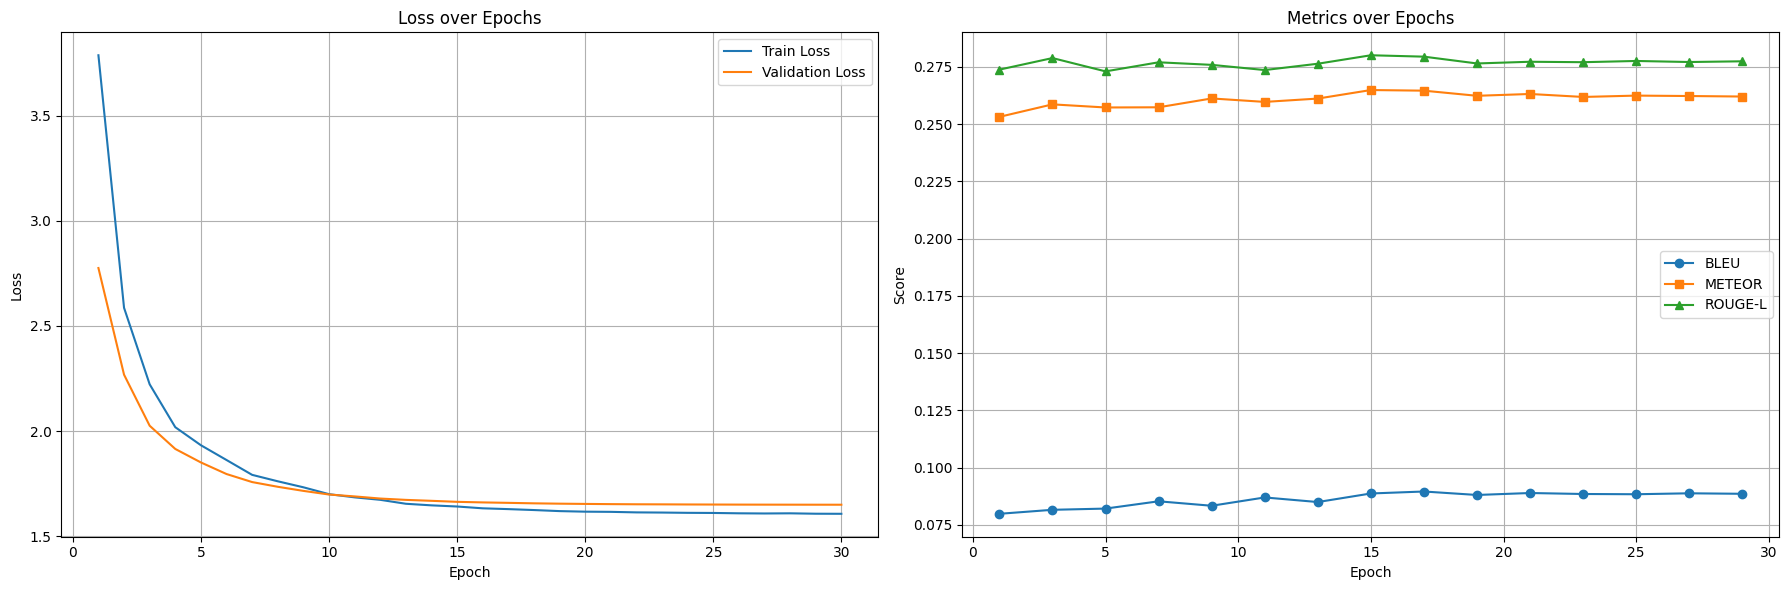

In [ ]:
plot_training_history(history)


In [ ]:
dataset['caption'][5000]

'In the image, three miniature figures are engaged in a skiing adventure on a snowy mountain. The figure on the left is wearing a vibrant yellow outfit and holding ski poles, carving their way down the slope. The middle figure is dressed in a striking red outfit and also holding ski poles, navigating the terrain with ease. The figure on the right is clad in a cool blue outfit and is using ski poles to aid in their descent. All three figures are standing on skis, ready to glide down the mountain. The backdrop of this scene is a clear blue sky, providing a stark contrast to the white snow that blankets the mountain.'

## try new image

In [ ]:
! pip install pillow_heif

In [ ]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.models import resnet50
import pillow_heif  # Add import for pillow_heif

# 1. Define the image preprocessing
def get_image_transform():
    return transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                           std=[0.229, 0.224, 0.225])
    ])

# 2. Feature extractor
class FeatureExtractor(nn.Module):
    def __init__(self):
        super().__init__()
        self.resnet = resnet50(pretrained=True)
        self.resnet = nn.Sequential(*list(self.resnet.children())[:-1])

    def forward(self, x):
        features = self.resnet(x)
        return features.flatten(1)

# 3. Modified test function
def test_on_image(image_path, model, tokenizer, device, max_length=30):
    # Initialize feature extractor and transform
    feature_extractor = FeatureExtractor().to(device).eval()
    transform = get_image_transform()

    # Load and preprocess image (handling AVIF format)
    try:
        # Attempt to open as a regular image
        image = Image.open(image_path).convert('RGB')
    except (Image.UnidentifiedImageError, FileNotFoundError) as e:  # Catch specific errors using Image instead of PIL
        # If regular opening fails, try opening as heif or raise error if file not found
        try:
            heif_file = pillow_heif.read_heif(image_path)
            image = Image.frombytes(
                heif_file.mode,
                heif_file.size,
                heif_file.data,
                "raw",
                heif_file.mode,
                heif_file.stride
            ).convert('RGB')
        except Exception as inner_e:
            print(f"Could not open image as AVIF: {inner_e}")
            raise e  # Re-raise original exception

    image_tensor = transform(image).unsqueeze(0).to(device)

    # Extract features
    with torch.no_grad():
        latent_vector = feature_extractor(image_tensor)
        latent_vector = latent_vector.cpu().numpy()

    # Generate caption
    model.eval()
    with torch.no_grad():
        # Adjust the shape of the latent vector to match the model's expected input size
        latent_vector = torch.FloatTensor(latent_vector).to(device)

        tokens = [tokenizer.word2idx["<start>"]]
        # Modify this line to create a Linear layer for projection
        # This layer will map the 2048-dimensional features to the expected 4096 dimensions
        projection_layer = nn.Linear(2048, 4096).to(device)  # Assuming your latent2hidden layer expects 4096
        projected_latent_vector = projection_layer(latent_vector)

        hidden = model.latent2hidden(projected_latent_vector)  # Now use the projected vector
        hidden = hidden.view(model.num_layers, 1, model.hidden_dim)
        cell = torch.zeros_like(hidden, device=device)

        for _ in range(max_length):
            input_token = torch.tensor([tokens[-1]], device=device).unsqueeze(0)
            embedding = model.embedding(input_token)

            output, (hidden, cell) = model.lstm(embedding, (hidden, cell))
            predicted_token = model.fc(output.squeeze(1)).argmax(1).item()

            tokens.append(predicted_token)
            if predicted_token == tokenizer.word2idx["<end>"]:
                break

    caption = tokenizer.decode(tokens[1:-1])

    # Display results
    plt.figure(figsize=(10, 8))
    plt.imshow(image)
    plt.title(f"Predicted: {caption}", fontsize=12)
    plt.axis('off')
    plt.show()
    return caption

In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import torch
from torch.serialization import add_safe_globals
import numpy as np

# 1. Safely load the checkpoint
try:
    with add_safe_globals([np._core.multiarray.scalar]):
        checkpoint = torch.load("/content/drive/MyDrive/image_captioning/best_model.pth", map_location=device)
except:
    print("Warning: Using weights_only=False which is less secure")
    checkpoint = torch.load("/content/drive/MyDrive/image_captioning/best_model.pth", map_location=device, weights_only=False)

# 2. Verify latent dimension from checkpoint
print("Keys in checkpoint:", checkpoint.keys())  # Debug info
latent_dim = 4096  # From your error message - adjust if different

# 3. Rebuild model with CORRECT latent dimension
model = ImageCaptioningModel(
    latent_dim=latent_dim,  # Must match checkpoint (4096 from error)
    embed_dim=300,
    hidden_dim=600,
    vocab_size=len(checkpoint['word2idx']),
    num_layers=2,
    dropout=0.3
).to(device)

# 4. Load state dict with strict=False to handle potential mismatches
model.load_state_dict(checkpoint['model_state_dict'], strict=False)
model.eval()

# 5. Rebuild tokenizer
class Tokenizer:
    def __init__(self, word2idx, idx2word):
        self.word2idx = word2idx
        self.idx2word = idx2word
    def decode(self, indices):
        return " ".join([self.idx2word.get(idx, "<unk>") for idx in indices])



Keys in checkpoint: dict_keys(['epoch', 'model_state_dict', 'optimizer_state_dict', 'loss', 'metrics', 'word2idx', 'idx2word'])


In [ ]:
tokenizer = Tokenizer(checkpoint['word2idx'], checkpoint['idx2word'])


In [ ]:
!pip install pillow_heif

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 121MB/s]


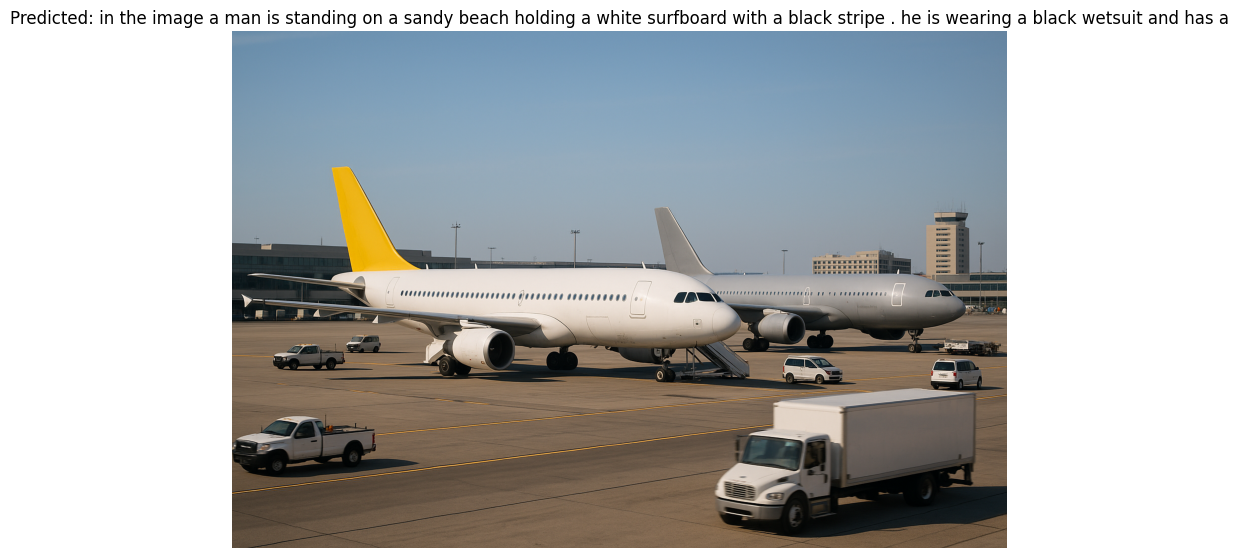

Generated Caption: in the image a man is standing on a sandy beach holding a white surfboard with a black stripe . he is wearing a black wetsuit and has a


In [ ]:
# Test on new image
test_image = "/content/drive/MyDrive/image_captioning/Airplane.png"
caption = test_on_image(test_image, model, tokenizer, device)
print("Generated Caption:", caption)

In [ ]:
for i in range (30):
   print ("caption \n")
   print(dataset[i]["caption"],"\n")
   print(dataset[i]['vae_latent'],"\n")

caption 

The image captures a bustling scene at an airport. Two large airplanes, one white and the other gray, are parked on the tarmac. The white airplane has a yellow tail and is positioned slightly ahead of its counterpart. Several vehicles, including trucks and cars, are scattered around the tarmac, indicating ongoing operations. In the background, buildings rise up against a clear blue sky, suggesting the presence of an airport terminal or control tower. 

[3.7187328338623047, 1.21875, 3.886786699295044, 2.072293758392334, 4.777338027954102, 3.818338632583618, 2.654279947280884, -0.8139682412147522, 0.31786736845970154, 2.5214786529541016, 0.20335717499256134, -0.11824672669172287, 1.9198745489120483, 6.101564407348633, 5.523430347442627, 2.7031261920928955, 3.2363388538360596, 1.8320125341415405, 1.7929717302322388, -0.4540955126285553, 3.560553550720215, 3.580061435699463, 2.775395631790161, 2.716801881790161, 0.4242714047431946, -2.73046875, 0.018854673951864243, -1.9755728244

## test Vae laten

In [ ]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import pillow_heif
from torch import nn

def test_with_vae_latent(image_path, vae_latent, model, tokenizer, device, max_length=30, true_caption=None):
    """
    Generate and display caption using precomputed VAE latent

    Args:
        image_path (str): Path to image for display only
        vae_latent (np.array/torch.Tensor): Precomputed latent vector
        model: Trained captioning model
        tokenizer: Text tokenizer
        device: torch device
        max_length (int): Max caption length
        true_caption (str): Optional ground truth caption for comparison
    """
    # 1. Load and prepare image for display
    try:
        img = Image.open(image_path).convert('RGB')
    except (Image.UnidentifiedImageError, FileNotFoundError):
        try:
            heif_file = pillow_heif.read_heif(image_path)
            img = Image.frombytes(
                heif_file.mode,
                heif_file.size,
                heif_file.data,
                "raw",
                heif_file.mode,
                heif_file.stride
            ).convert('RGB')
        except Exception as e:
            raise ValueError(f"Could not open image at {image_path}: {str(e)}")

    # 2. Process VAE latent
    if not isinstance(vae_latent, torch.Tensor):
        vae_latent = torch.FloatTensor(vae_latent)

    latent_vector = vae_latent.unsqueeze(0).to(device)

    # Handle dimension mismatch if needed
    if latent_vector.shape[1] != model.latent2hidden.in_features:
        projection = nn.Linear(latent_vector.shape[1], model.latent2hidden.in_features).to(device)
        latent_vector = projection(latent_vector)

    # 3. Generate caption
    model.eval()
    with torch.no_grad():
        # Initialize LSTM states
        hidden = model.latent2hidden(latent_vector)
        hidden = hidden.view(model.num_layers, 1, model.hidden_dim)
        cell = torch.zeros_like(hidden, device=device)

        # Start with <start> token
        tokens = [tokenizer.word2idx["<start>"]]

        for _ in range(max_length):
            # Prepare input token
            input_token = torch.tensor([tokens[-1]], device=device).unsqueeze(0)

            # Forward pass
            embedding = model.embedding(input_token)
            output, (hidden, cell) = model.lstm(embedding, (hidden, cell))
            logits = model.fc(output.squeeze(1))

            # Get next token
            predicted_token = logits.argmax(1).item()
            tokens.append(predicted_token)

            # Stop if <end> token is generated
            if predicted_token == tokenizer.word2idx["<end>"]:
                break

    # Decode tokens to text (excluding <start> and <end>)
    predicted_caption = tokenizer.decode(tokens[1:-1])

    # 4. Display results
    plt.figure(figsize=(12, 8))
    plt.imshow(img)

    title = f"Predicted: {predicted_caption}"
    if true_caption:
        title = f"True: {true_caption}\nPredicted: {predicted_caption}"

    plt.title(title, fontsize=12, pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    return predicted_caption

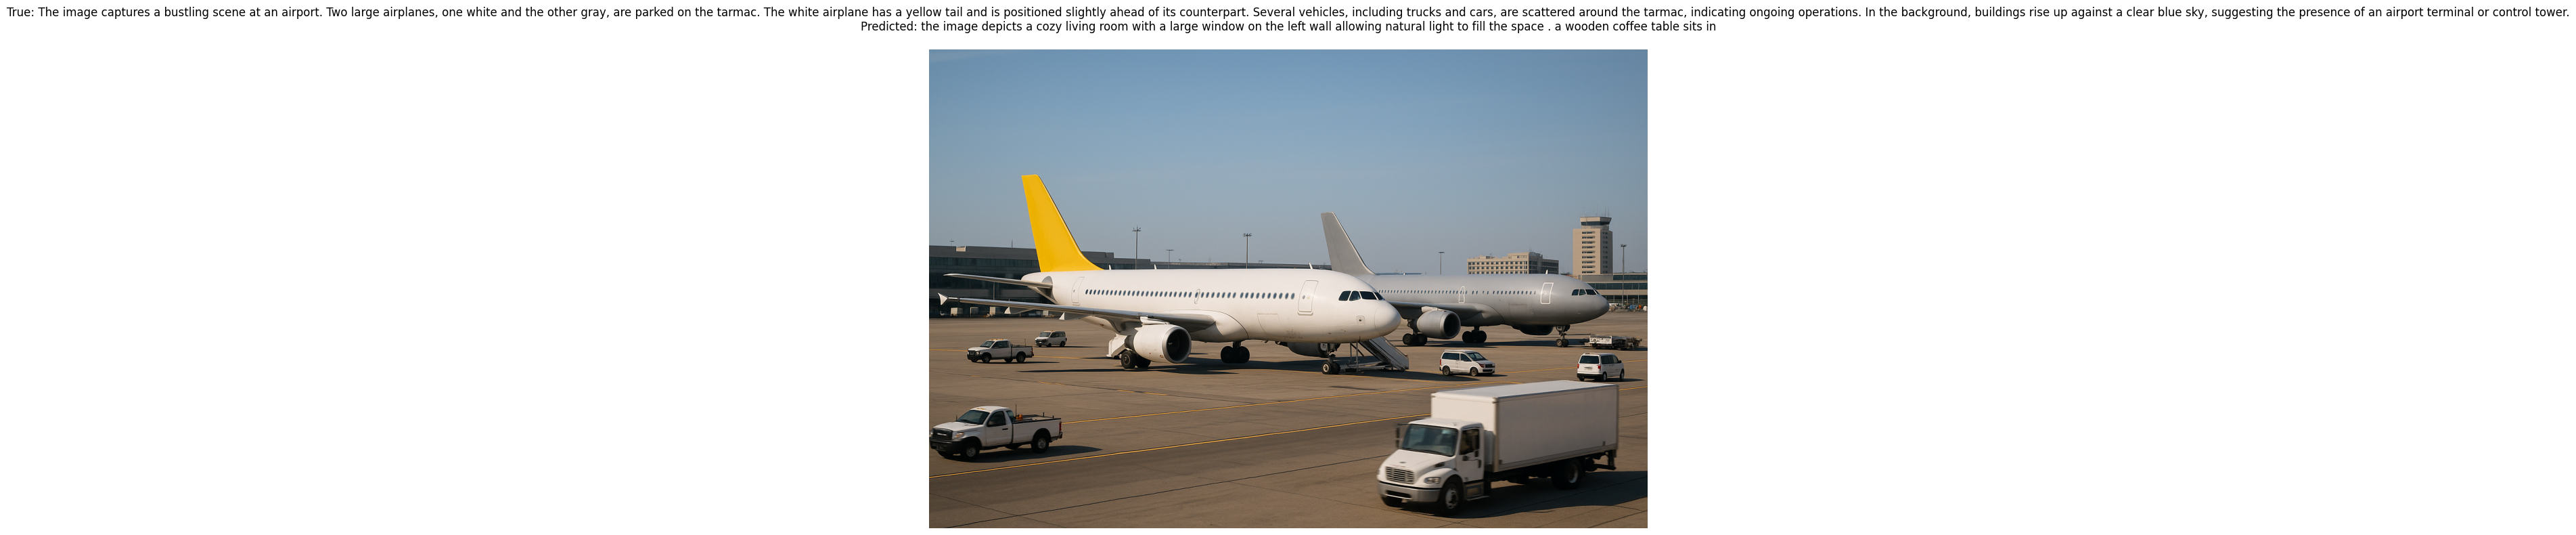

Generated Caption: the image depicts a cozy living room with a large window on the left wall allowing natural light to fill the space . a wooden coffee table sits in


In [ ]:
# Example variables
image_path = "/content/drive/MyDrive/image_captioning/Airplane.png" # Only for display
vae_latent = dataset[0]['vae_latent']  # Your precomputed latent vector
true_caption = dataset[0]['caption']  # Optional for comparison

# Generate and display caption
predicted = test_with_vae_latent(
    image_path=image_path,
    vae_latent=vae_latent,
    model=model,
    tokenizer=tokenizer,
    device=device,
    true_caption=true_caption  # Optional
)

print("Generated Caption:", predicted)